*Import the Library*

In [1]:
# Instalasi library yang akan digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load file dataset dalam bentuk csv
data_f = pd.read_csv("fertilizer_recommendation.csv")

# Mengecek kolom
data_f

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
0,20,83,26,Clayey,rice,90,49,36,Urea
1,25,84,32,Loamy,rice,66,59,36,Urea
2,33,64,50,Loamy,Wheat,41,0,0,Urea
3,34,65,54,Loamy,Wheat,38,0,0,Urea
4,38,72,51,Loamy,Wheat,39,0,0,Urea
...,...,...,...,...,...,...,...,...,...
547,12,95,42,Sandy,orange,11,14,5,10-10-10
548,12,95,42,Sandy,orange,11,14,5,10-10-10
549,27,80,31,Clayey,kidneybeans,19,21,6,10-10-10
550,27,80,31,Clayey,kidneybeans,19,21,6,10-10-10


*Data Summary*

In [3]:
# Menampilkan tipe data di tiap kolom
data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temparature  552 non-null    int64 
 1   Humidity     552 non-null    int64 
 2   Moisture     552 non-null    int64 
 3   Soil_Type    552 non-null    object
 4   Crop_Type    552 non-null    object
 5   Nitrogen     552 non-null    int64 
 6   Potassium    552 non-null    int64 
 7   Phosphorous  552 non-null    int64 
 8   Fertilizer   552 non-null    object
dtypes: int64(6), object(3)
memory usage: 38.9+ KB


In [4]:
# Menampilkan deskripsi kolom tipe number atau informasi statistik
data_f.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000
mean,28.630435,64.557971,42.840580,28.521739,10.144928,21.115942
std,5.088082,11.880236,11.507275,29.121989,13.456956,14.920514
min,0.000000,50.000000,25.000000,0.000000,0.000000,0.000000
25%,26.000000,54.000000,33.000000,10.000000,0.000000,8.000000
50%,29.000000,62.000000,41.000000,15.000000,0.000000,20.000000
75%,32.000000,68.000000,51.000000,37.000000,18.000000,36.000000
max,38.000000,95.000000,65.000000,126.000000,59.000000,54.000000


In [5]:
# Menampilkan 5 baris teratas (head)
# Menampilkan 5 baris terbawah (tail)
print('Dataset : \n', data_f.head())
print('Dataset : \n', data_f.tail())
print('\n')

Dataset : 
    Temparature  Humidity  Moisture Soil_Type Crop_Type  Nitrogen  Potassium  \
0           20        83        26    Clayey      rice        90         49   
1           25        84        32     Loamy      rice        66         59   
2           33        64        50     Loamy     Wheat        41          0   
3           34        65        54     Loamy     Wheat        38          0   
4           38        72        51     Loamy     Wheat        39          0   

   Phosphorous Fertilizer  
0           36       Urea  
1           36       Urea  
2            0       Urea  
3            0       Urea  
4            0       Urea  
Dataset : 
      Temparature  Humidity  Moisture Soil_Type    Crop_Type  Nitrogen  \
547           12        95        42     Sandy       orange        11   
548           12        95        42     Sandy       orange        11   
549           27        80        31    Clayey  kidneybeans        19   
550           27        80        31    C

*Data Preparation*

In [6]:
# Menemukan nilai yang hilang
data_f.isnull().sum()

Temparature    0
Humidity       0
Moisture       0
Soil_Type      0
Crop_Type      0
Nitrogen       0
Potassium      0
Phosphorous    0
Fertilizer     0
dtype: int64

In [7]:
# Mengulang atau reset index dataframe yang sudah tidak terurut/ tersortir lagi.
data_f.reset_index(drop=True)

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
0,20,83,26,Clayey,rice,90,49,36,Urea
1,25,84,32,Loamy,rice,66,59,36,Urea
2,33,64,50,Loamy,Wheat,41,0,0,Urea
3,34,65,54,Loamy,Wheat,38,0,0,Urea
4,38,72,51,Loamy,Wheat,39,0,0,Urea
...,...,...,...,...,...,...,...,...,...
547,12,95,42,Sandy,orange,11,14,5,10-10-10
548,12,95,42,Sandy,orange,11,14,5,10-10-10
549,27,80,31,Clayey,kidneybeans,19,21,6,10-10-10
550,27,80,31,Clayey,kidneybeans,19,21,6,10-10-10


In [8]:
# Encoding kolom kategorial
le = LabelEncoder()
data_f['Type_Encoding'] = le.fit_transform(data_f['Crop_Type'])

data_f.head()

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer,Type_Encoding
0,20,83,26,Clayey,rice,90,49,36,Urea,15
1,25,84,32,Loamy,rice,66,59,36,Urea,15
2,33,64,50,Loamy,Wheat,41,0,0,Urea,10
3,34,65,54,Loamy,Wheat,38,0,0,Urea,10
4,38,72,51,Loamy,Wheat,39,0,0,Urea,10


*Data Visualization*

In [9]:
# Menampilkan kolom
data_f.columns

Index(['Temparature', 'Humidity', 'Moisture', 'Soil_Type', 'Crop_Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer', 'Type_Encoding'],
      dtype='object')

Text(0.5, 1.0, 'Hubungan antara Kelembapan Tanah dengan Jenis Tanah')

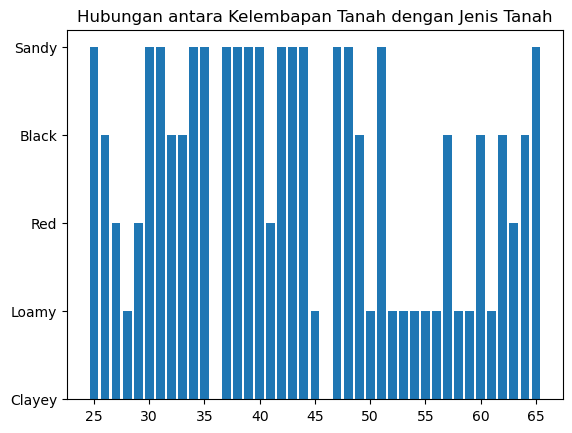

In [10]:
# Hubungan antara kelembapan tanah dengan jenis tanah
plt.bar(data_f['Moisture'], data_f['Soil_Type'])
plt.title("Hubungan antara Kelembapan Tanah dengan Jenis Tanah")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

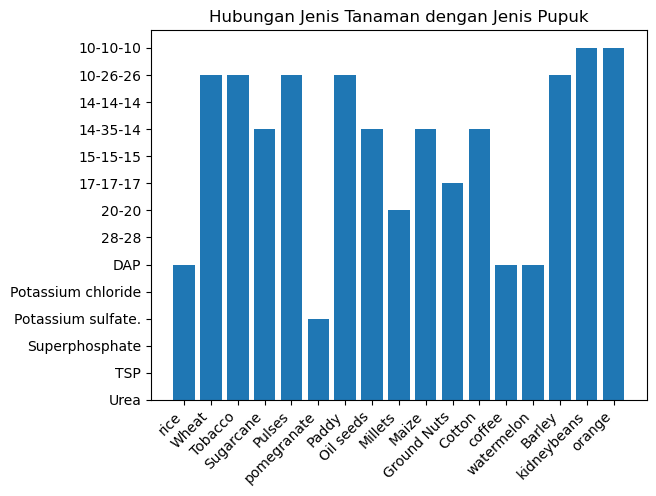

In [11]:
# Hubungan jenis tanaman dengan jenis pupuk
plt.bar(data_f['Crop_Type'], data_f['Fertilizer'])
plt.title("Hubungan Jenis Tanaman dengan Jenis Pupuk")
plt.xticks(rotation=45, horizontalalignment='right')